# 데이터 전처리

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

상위 5개 데이터 확인

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터 정보

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


처음부터 800번 데이터까지 학습 데이터로 이용, 나머지 데이터를 테스트 데이터로 이용하여 모델과의 결과 비교하기

In [6]:
train_df = df[:800]
test_df = df[800:]

In [7]:
print(len(train_df))
print(len(test_df))

800
91


pclass와 survived의 관계 (관계 O)

In [8]:
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


sex와 survived의 관계 (관계 O)

In [9]:
train_df[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.745583
1,male,0.187621


parch와 survived의 관계 (관계 적음)

In [10]:
train_df[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
2,2,0.527778
1,1,0.514851
3,3,0.500000
0,0,0.350163
5,5,0.250000
4,4,0.000000
6,6,0.000000


sibsp와 survived의 관계 (관계 적음)

In [12]:
train_df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.518325
2,2,0.481481
0,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


age와 survived의 관계

<Axes: xlabel='age', ylabel='Count'>

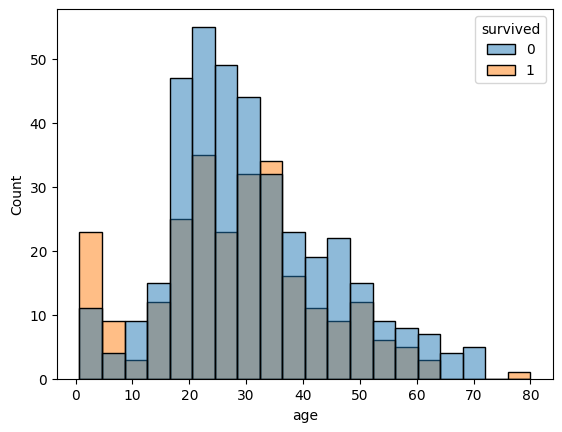

In [13]:
sns.histplot(data=train_df, x='age', bins=20, hue='survived')

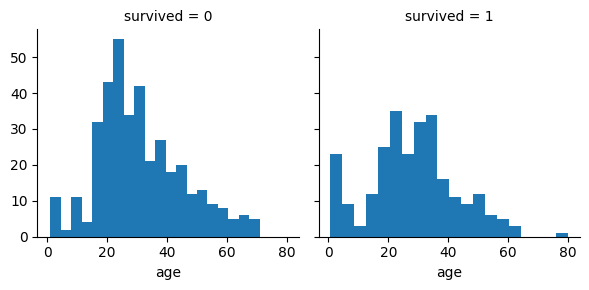

In [15]:
a = sns.FacetGrid(train_df, col='survived')
a.map(plt.hist, 'age', bins=20)

pclass에 따른 age별 survived 유무

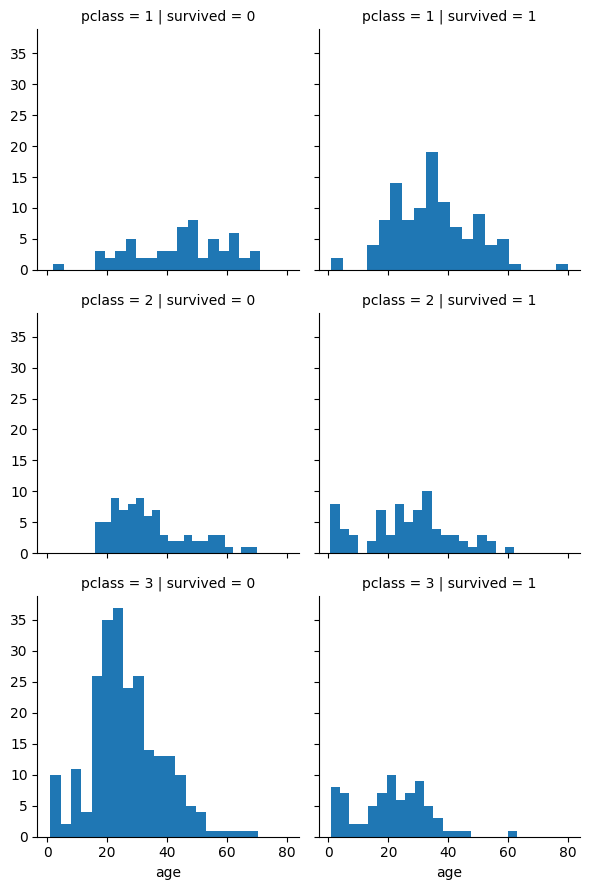

In [16]:
a = sns.FacetGrid(train_df, col='survived', row='pclass')
a.map(plt.hist, 'age', bins=20)

필요없는 필드 삭제

In [18]:
names = train_df.columns
print(names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [19]:
train_df = train_df.drop(names[4:], axis=1)

In [20]:
train_df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
795,0,2,male,39.0
796,1,1,female,49.0
797,1,3,female,31.0
798,0,3,male,30.0


In [21]:
test_df = test_df.drop(names[4:], axis=1)
test_df.head()

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00


결측값 확인

In [22]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived      0
pclass        0
sex           0
age         163
dtype: int64
survived     0
pclass       0
sex          0
age         14
dtype: int64


age 평균으로 age 결측값 채우기  

In [24]:
# pclass별 age의 평균으로 결측값 채우기
# train_df["age"] = train_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))
# test_df["age"] = test_df.groupby(['pclass']).age.transform(lambda x: x.fillna(x.mean()))

In [25]:
train_df.fillna(train_df.mean()[['age']], inplace=True)
test_df.fillna(test_df.mean()[['age']], inplace=True)

<ipython-input-25-a1b326de8cbc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.fillna(train_df.mean()[['age']], inplace=True)
<ipython-input-25-a1b326de8cbc>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.fillna(test_df.mean()[['age']], inplace=True)


In [26]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived    0
pclass      0
sex         0
age         0
dtype: int64
survived    0
pclass      0
sex         0
age         0
dtype: int64


성별 인코딩

In [27]:
map_dict = {'female': 0, 'male': 1}

train_df['sex'] = train_df['sex'].map(map_dict).astype(int)
test_df['sex'] = test_df['sex'].map(map_dict).astype(int)

In [28]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


나이 분류

In [30]:
def age_function(x):
  if x < 20:
    return 1
  elif x < 40:
    return 2
  elif x < 60:
    return 3
  else:
    return 4

In [31]:
train_df['age'] = train_df['age'].apply(age_function)
test_df['age'] = test_df['age'].apply(age_function)

In [32]:
train_df.head()

,survived,pclass,sex,age
0,0,3,1,2
1,1,1,0,2
2,1,3,0,2
3,1,1,0,2
4,0,3,1,2


# 머신러닝 모델 구성 및 결과 검증

In [37]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

데이터 분류

In [41]:
X_train = train_df.drop(["survived"], axis=1)
Y_train = train_df["survived"]
X_test = test_df.drop(["survived"], axis=1)
Y_test = test_df["survived"]

In [35]:
X_train.head()

,pclass,sex,age
0,3,1,2
1,1,0,2
2,3,0,2
3,1,0,2
4,3,1,2


In [36]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

모델 생성 및 학습(decision tree 사용)

In [39]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

모델 정확도 검증

In [42]:
print(decision_tree.score(X_train, Y_train))
print(decision_tree.score(X_test, Y_test))

0.8
0.7692307692307693


실제값 예측값 비교 구현

In [43]:
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]


In [44]:
Y_test

800    0
801    1
802    1
803    1
804    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 91, dtype: int64

In [45]:
len(Y_pred)

91

In [46]:
len(Y_test)

91

In [47]:
Y_test_list = list(Y_test)

In [49]:
total = 0
for pred, test in zip(Y_pred, Y_test_list):
  if pred == test:
    total +=1 
  else:
    pass

print(total)
print(total / len(Y_pred))

70
0.7692307692307693


graphviz를 이용한 tree 구조 시각화

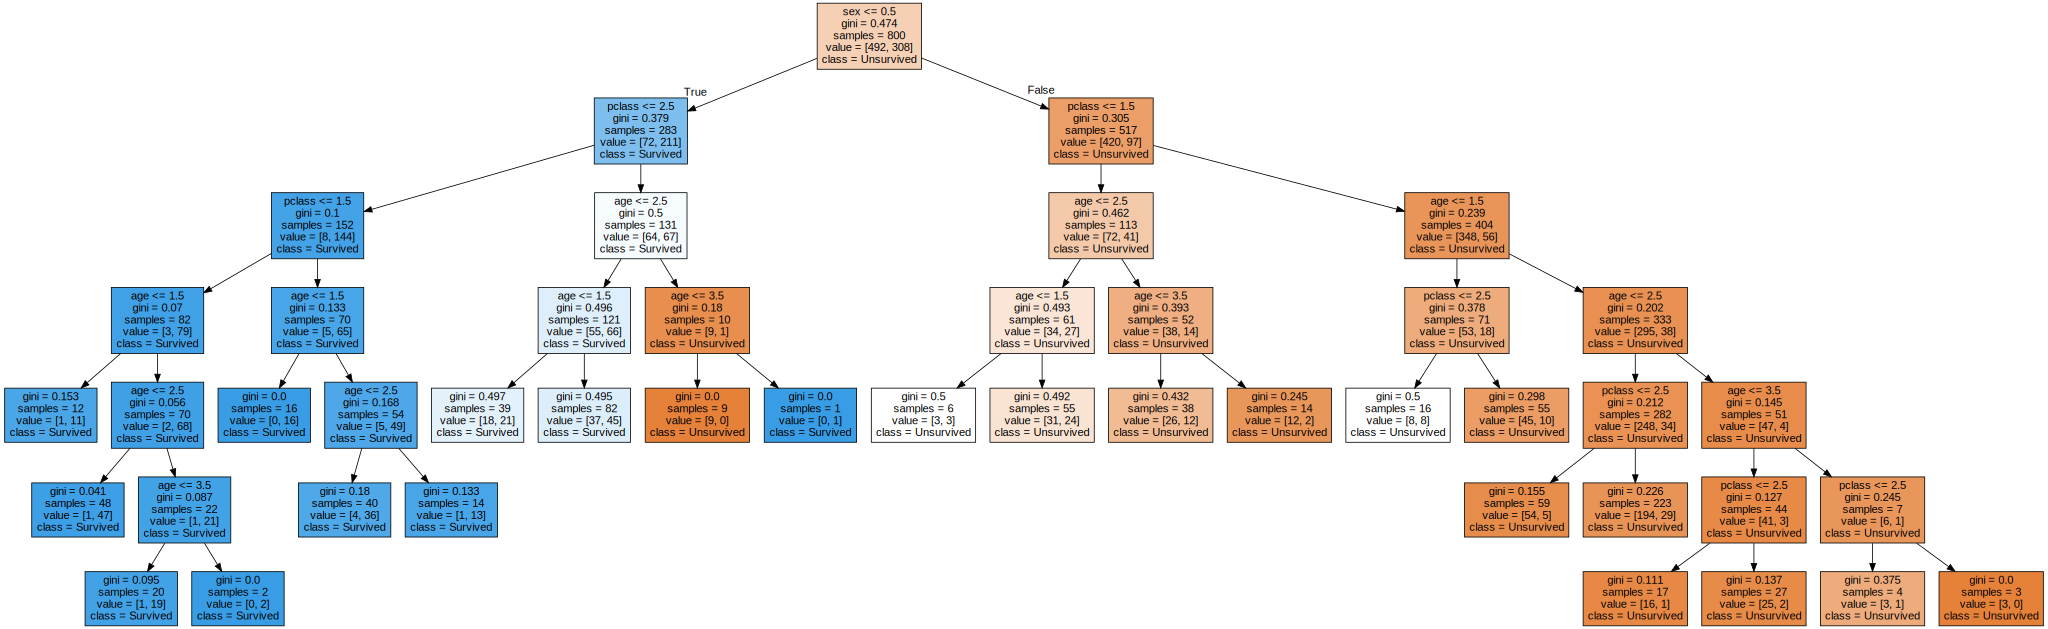

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(
    decision_tree,
    out_file="titanic.dot",
    feature_names=['pclass', 'sex', 'age'],
    class_names=['Unsurvived', 'Survived'],
    filled=True
)

import graphviz
with open("titanic.dot") as f:
  dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree')
dot